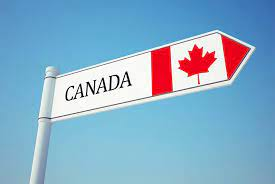

# Immigration au Canada entre 1980 et 2013

Ensemble de données : Immigration au Canada de 1980 à 2013 - Flux migratoires internationaux à destination et en provenance de certains pays - La révision 2015 du site des Nations Unies.

L'ensemble de données contient des données annuelles sur les flux de migrants internationaux tels qu'enregistrés par les pays de destination. Les données présentent à la fois les entrées et les sorties en fonction du lieu de naissance, de la citoyenneté ou du lieu de résidence précédent/suivant pour les étrangers et les nationaux. Dans ce laboratoire, nous allons nous concentrer sur les données de l'immigration canadienne.

## Table des matières

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Description du jeu de données](#0)<br>
2. [Exploration des données](#1)<br>
2. [Data visualisation](#1)<br>

In [31]:
## Téléchargement et préparation des données
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlp

In [32]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20), # permet de sauter des 20 premières lignes du début
    skipfooter=2 # enlève les deux dernières lignes
    )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


## Description du jeu de données  <a id ="0"> </a>

In [33]:
df_can.head() # affiche les 05 premières lignes

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [34]:
df_can.tail()# les 05 dernières lignes

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [35]:
df_can.shape # le nombre de lignes et de colonnes

(195, 43)

In [36]:
all(isinstance(column, str) for column in df_can.columns) # verifie si les colonnes sont des strings

False

In [37]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

In [38]:
df_can.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,...,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,...,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,...,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,...,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


Les données ne contiennent pas de Valeurs manquantes.
On procedera neanmoins à quelques modifications à l'ensemble de données original afin de faciliter la création de nos visualisations.

In [39]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [40]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Data visualisation

In [41]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.3


### ** Continent

In [42]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


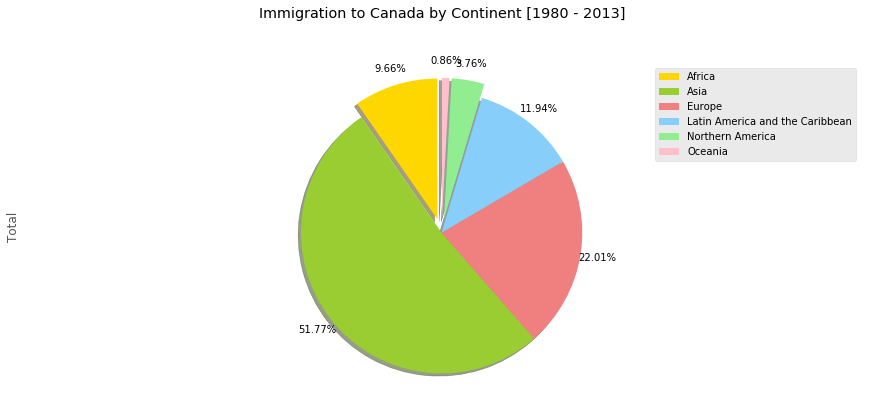

In [43]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.


df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.2f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow  
                            labels =None,
                            pctdistance=1.12,
                            colors = colors_list,
                            explode = explode_list
                            )


plt.title('Immigration to Canada by Continent [1980 - 2013]',y =1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.legend(labels = df_continents.index, loc ="upper right")

plt.show()

In [45]:
df_continent_2 = df_continents[years].transpose()
df_continent_2.head()

Continent,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
1980,3951,31025,39760,13081,9378,1942
1981,4363,34314,44802,15215,10030,1839
1982,3819,30214,42720,16769,9074,1675
1983,2671,24696,24638,15427,7100,1018
1984,2639,27274,22287,13678,6661,878


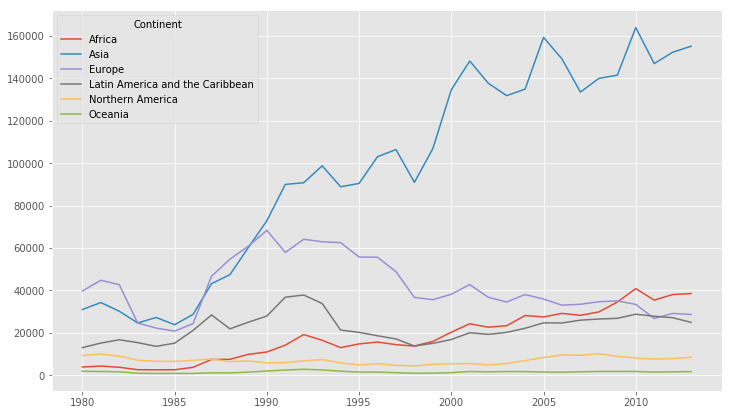

In [46]:
df_continent_2.plot(kind = 'line',figsize=(12, 7))

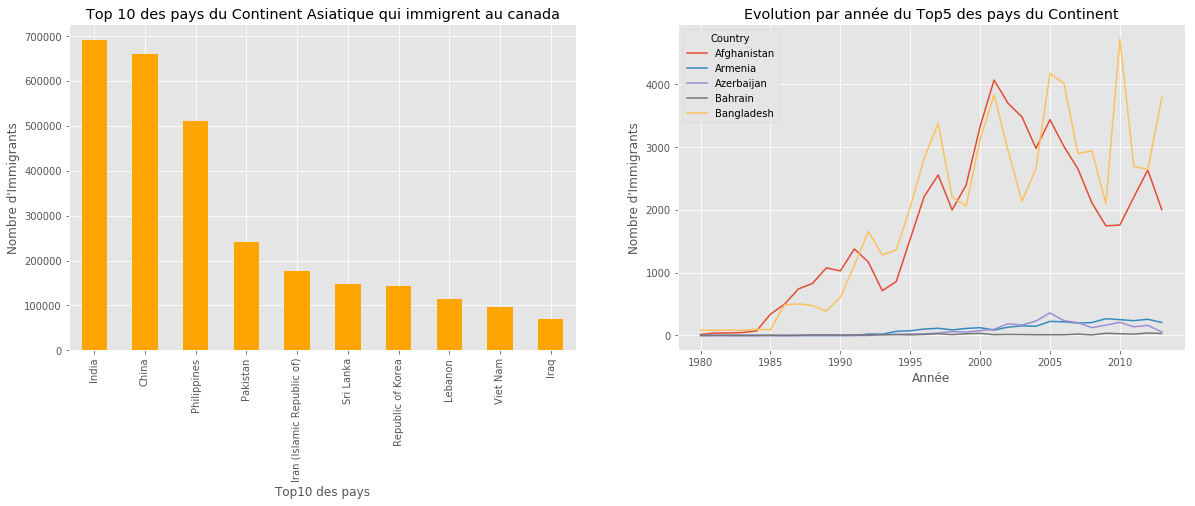

In [47]:
df_Asia = df_can[df_can['Continent']=="Asia"]
df_Asia.head()
df_Asia_T =df_Asia.sort_values(by = 'Total',ascending= False).head(10)
df_Asia = df_Asia[years].head(5).transpose()


fig = plt.figure(figsize =(20,6)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


df_Asia_T['Total'].plot(kind='bar',color = 'orange',ax =ax0)
df_Asia.plot(kind ='line',ax =ax1)

ax1.set_title('Evolution par année du Top5 des pays du Continent')
ax1.set_xlabel('Année')
ax1.set_ylabel("Nombre d'Immigrants")

ax0.set_title("Top 10 des pays du Continent Asiatique qui immigrent au canada")
ax0.set_ylabel("Nombre d'Immigrants")
ax0.set_xlabel("Top10 des pays")
plt.show()



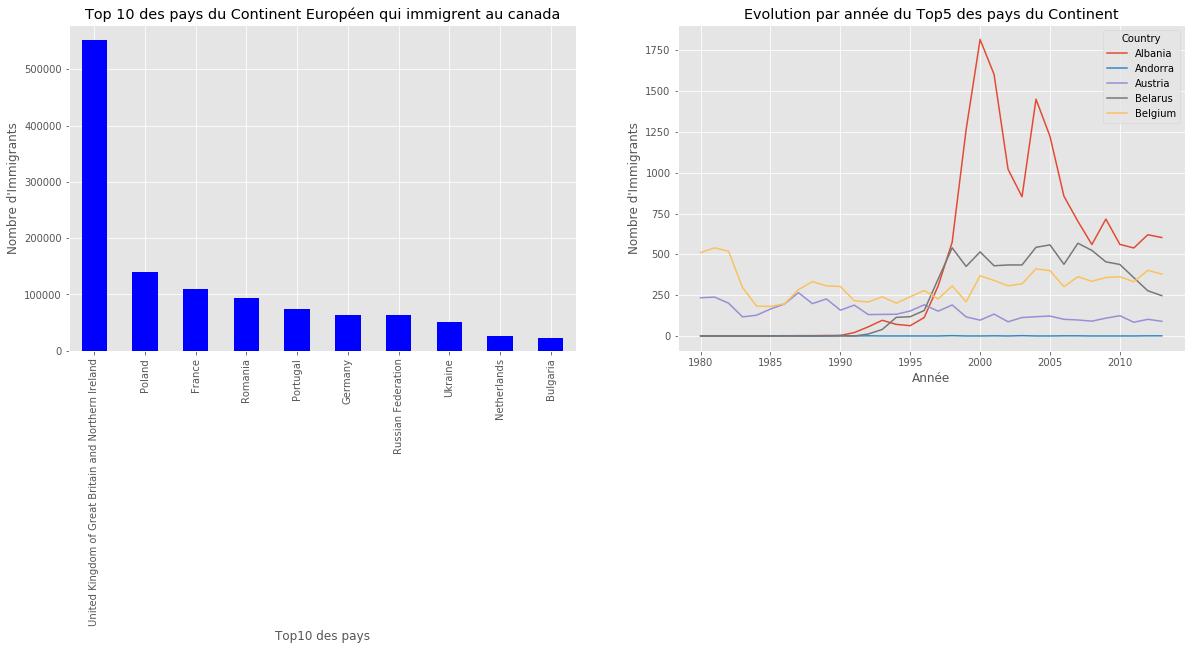

In [23]:
df_Europe = df_can[df_can['Continent']=="Europe"]
df_Europe_T =df_Europe.sort_values(by = 'Total',ascending= False).head(10)
df_Europe = df_Europe[years].head().transpose()

fig = plt.figure(figsize =(20,6)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


df_Europe_T['Total'].plot(kind='bar',color ='blue',ax =ax0)
df_Europe.plot(kind ='line',ax =ax1)

ax1.set_title('Evolution par année du Top5 des pays du Continent')
ax1.set_xlabel('Année')
ax1.set_ylabel("Nombre d'Immigrants")

ax0.set_title("Top 10 des pays du Continent Européen qui immigrent au canada")
ax0.set_ylabel("Nombre d'Immigrants")
ax0.set_xlabel("Top10 des pays")
plt.show()


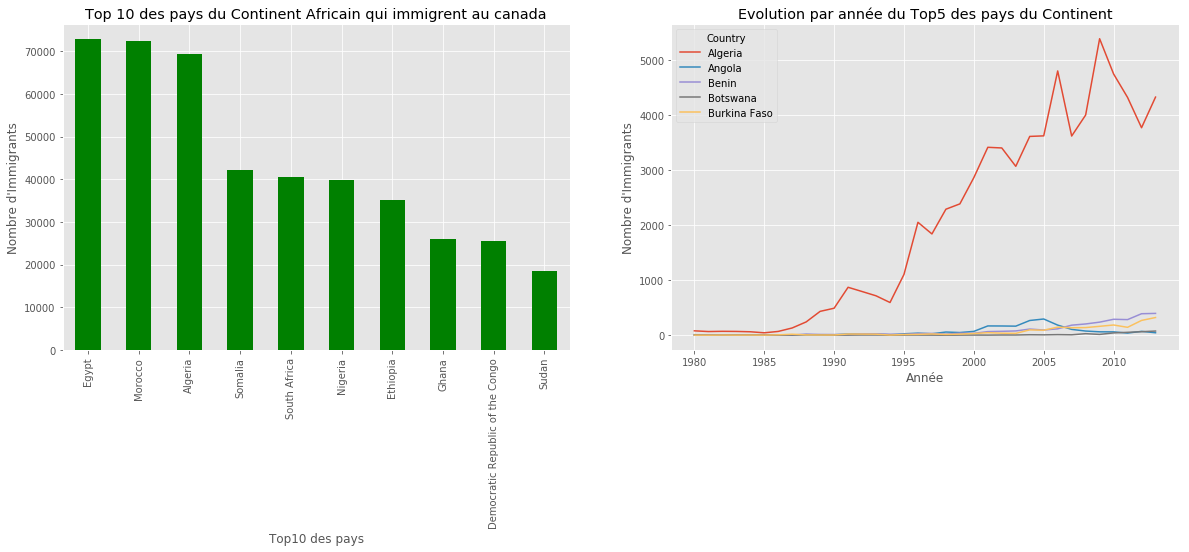

In [24]:
df_Africa = df_can[df_can['Continent']=="Africa"]

df_Africa_T =df_Africa.sort_values(by = 'Total',ascending= False).head(10)

df_Africa = df_Africa[years].head(5).transpose()

fig = plt.figure(figsize =(20,6)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**



df_Africa_T['Total'].plot(kind='bar',color ='green',ax=ax0)
df_Africa.plot(kind ='line',ax =ax1)

ax1.set_title('Evolution par année du Top5 des pays du Continent')
ax1.set_xlabel('Année')
ax1.set_ylabel("Nombre d'Immigrants")

ax0.set_title("Top 10 des pays du Continent Africain qui immigrent au canada")
ax0.set_ylabel("Nombre d'Immigrants")
ax0.set_xlabel("Top10 des pays")
plt.show()


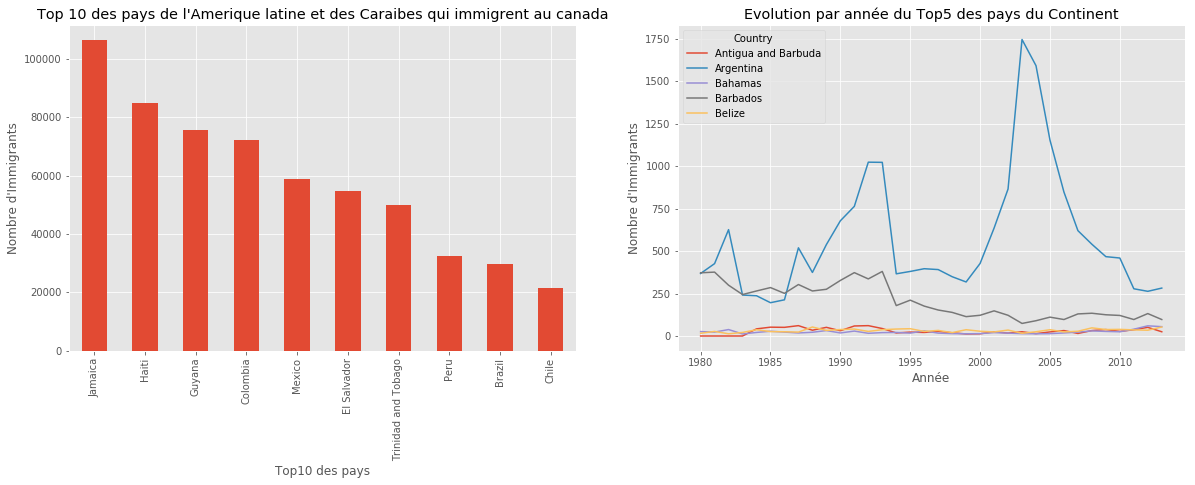

In [25]:
df_AlC = df_can[df_can['Continent']=="Latin America and the Caribbean"]
df_AlC_T =df_AlC.sort_values(by = 'Total',ascending= False).head(10)

df_AlC = df_AlC[years].head(5).transpose()


fig = plt.figure(figsize =(20,6)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**




df_AlC_T['Total'].plot(kind='bar',ax =ax0)
df_AlC.plot(kind ='line',ax =ax1)

ax1.set_title('Evolution par année du Top5 des pays du Continent')
ax1.set_xlabel('Année')
ax1.set_ylabel("Nombre d'Immigrants")

ax0.set_title("Top 10 des pays de l'Amerique latine et des Caraibes qui immigrent au canada")
ax0.set_ylabel("Nombre d'Immigrants")
ax0.set_xlabel("Top10 des pays")
plt.show()


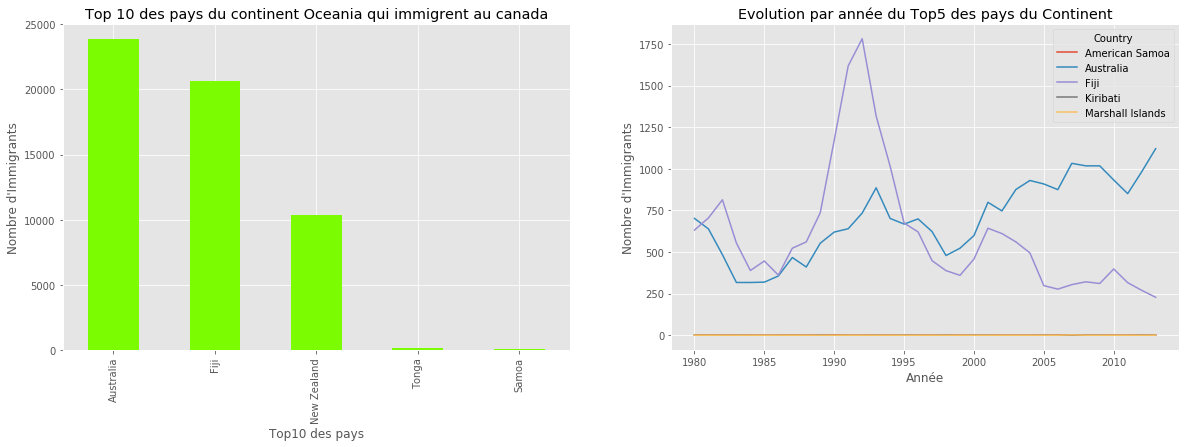

In [26]:
df_Oceania = df_can[df_can['Continent']== "Oceania"]

df_Oceania_T =df_Oceania.sort_values(by = 'Total',ascending= False).head(5)
df_Oceania = df_Oceania[years].head(5).transpose()
fig = plt.figure(figsize =(20,6)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**




df_Oceania_T['Total'].plot(kind='bar',color = "lawngreen",ax = ax0)

df_Oceania.plot(kind ='line',ax =ax1)

ax1.set_title('Evolution par année du Top5 des pays du Continent')
ax1.set_xlabel('Année')
ax1.set_ylabel("Nombre d'Immigrants")

ax0.set_title("Top 10 des pays du continent Oceania qui immigrent au canada")
ax0.set_ylabel("Nombre d'Immigrants")
ax0.set_xlabel("Top10 des pays")
plt.show()

##  Année 

In [27]:
df_continent_2['Total']= df_continent_2.sum(axis =1)
df_continent_2.head()

Continent,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania,Total
1980,3951,31025,39760,13081,9378,1942,99137
1981,4363,34314,44802,15215,10030,1839,110563
1982,3819,30214,42720,16769,9074,1675,104271
1983,2671,24696,24638,15427,7100,1018,75550
1984,2639,27274,22287,13678,6661,878,73417


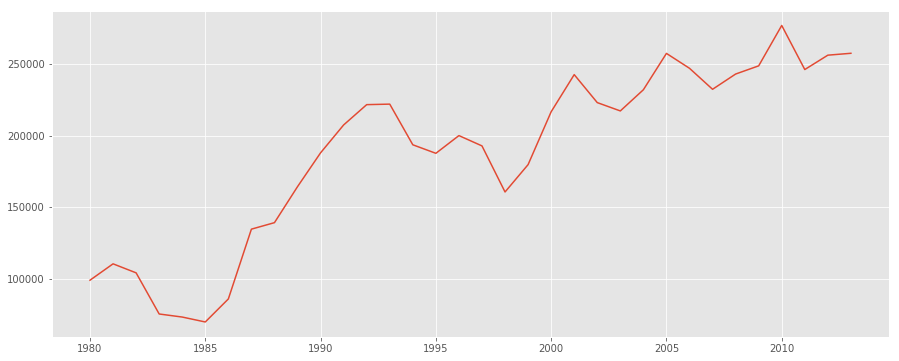

In [28]:
df_continent_2['Total'].plot(kind ='line',figsize =(15,6))

## Top5 des pays immigrant le plus au Canada

In [49]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Text(0.5,1,'India Immigrants to Canada from 1980 to 2013')

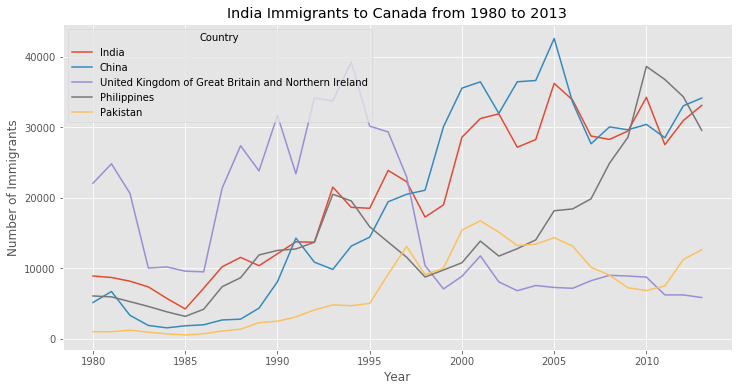

In [50]:
df_top5.plot(kind = 'line',figsize =(12,6))

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('India Immigrants to Canada from 1980 to 2013')

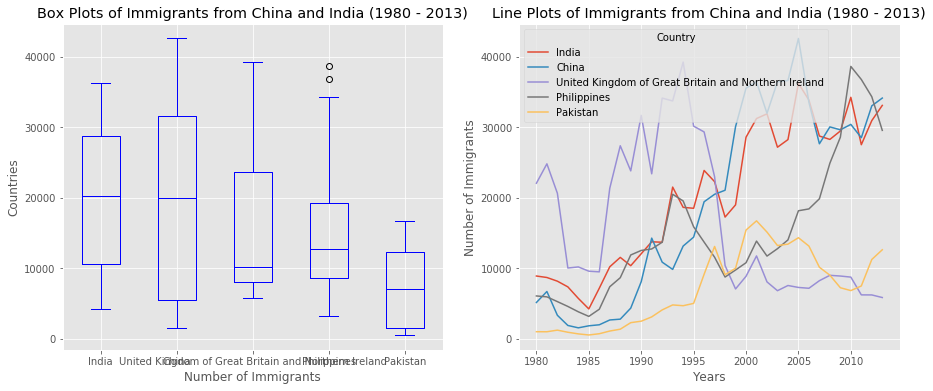

In [62]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_top5.plot(kind='box', color='blue', figsize=(15, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_top5.plot(kind='line', figsize=(15, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

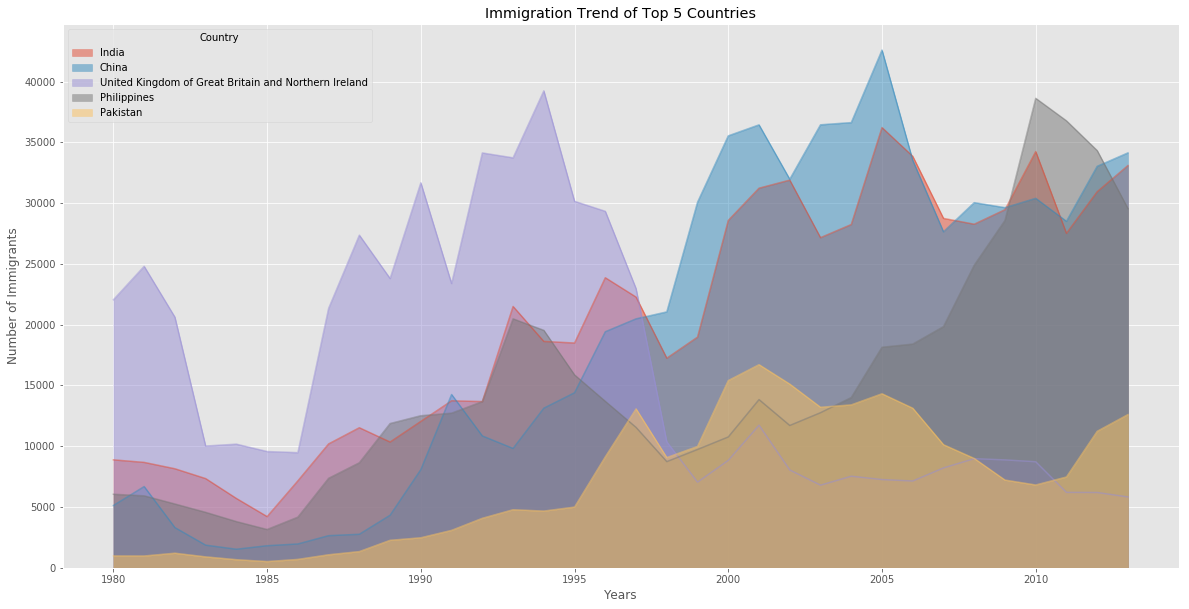

In [52]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

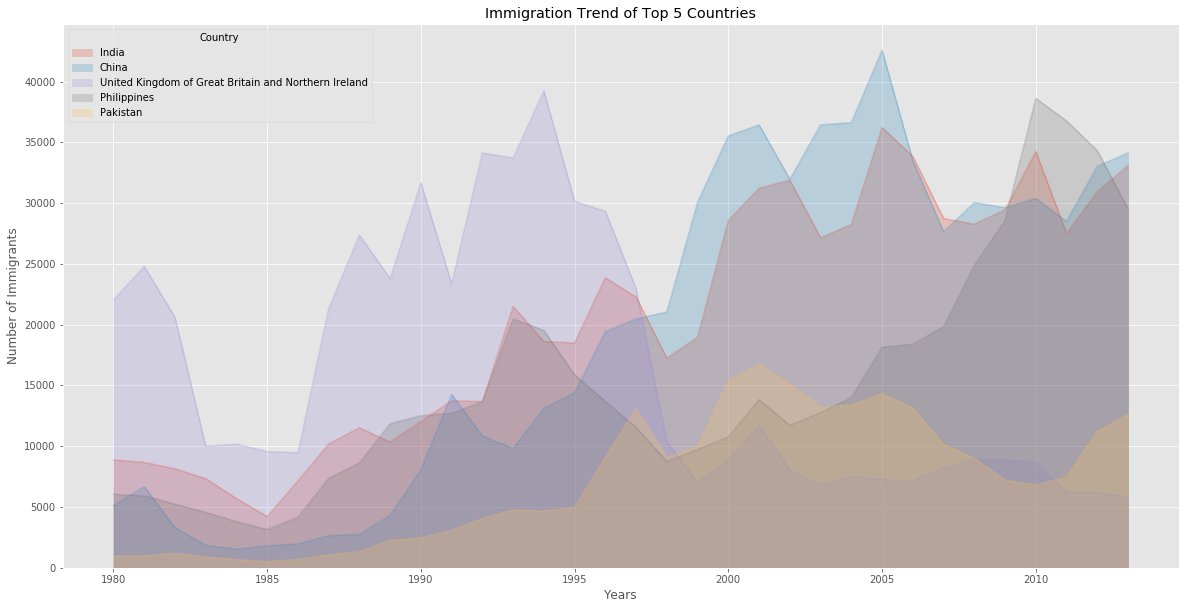

In [53]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

> On peut aussi chercher à connaître l'évolution des immigrations au canada par pays.
On a ainsi donc le cas de Iceland

In [54]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

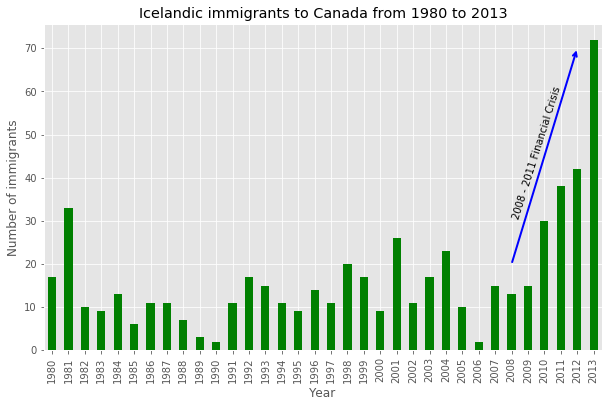

In [55]:
df_iceland.plot(kind='bar', figsize=(10, 6),color = 'green',rot = 90)

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot


# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()


>  Existe-il une relation entre l'année et le nombre des immigrants 

In [56]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


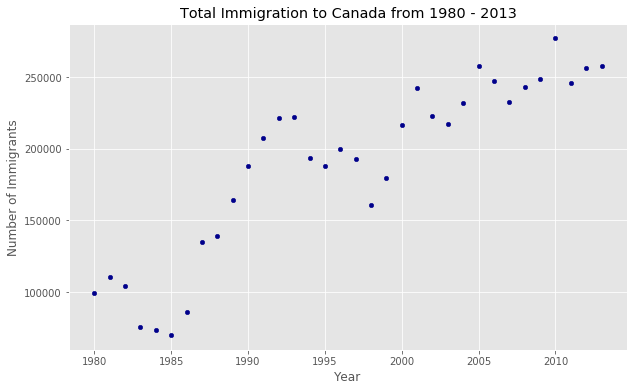

In [57]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [63]:
#install seaborn
#!pip3 install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


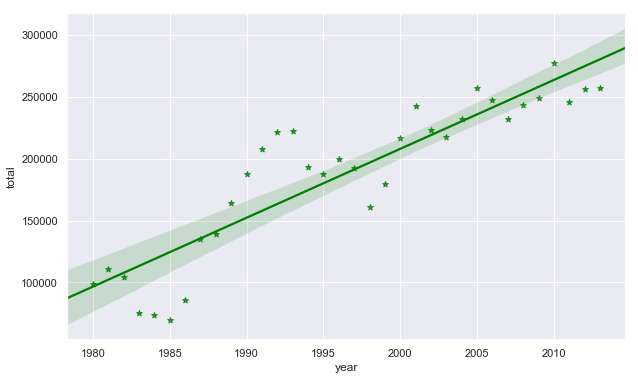

In [75]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.regplot(x='year',y = 'total',data = df_tot,color ='green',marker = "*")

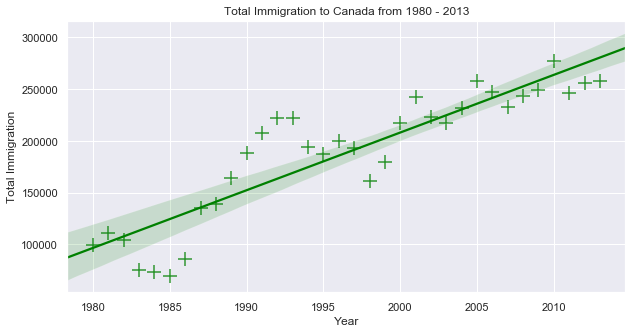

In [79]:
plt.figure(figsize=(10, 5))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

In [58]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [59]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

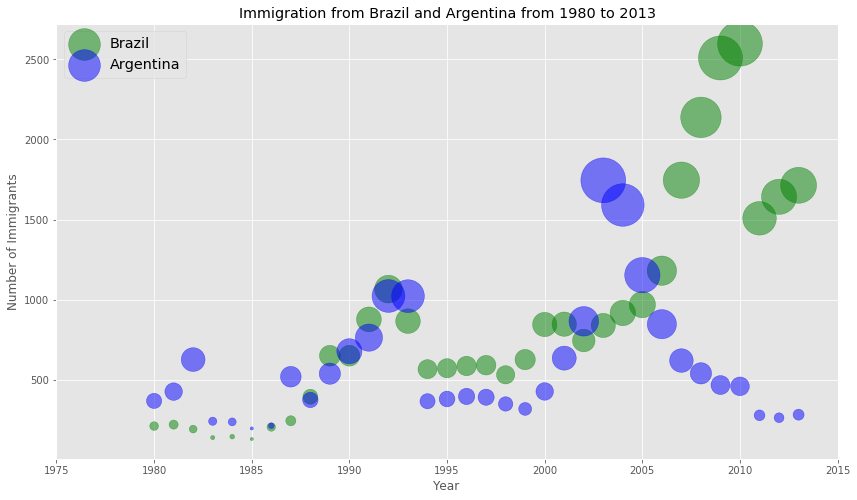

In [60]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [91]:
df_dp = df_can['Total'].sort_values()
df_dp.head()

Country
Palau               1
Western Sahara      2
Marshall Islands    2
New Caledonia       5
San Marino          5
Name: Total, dtype: int64

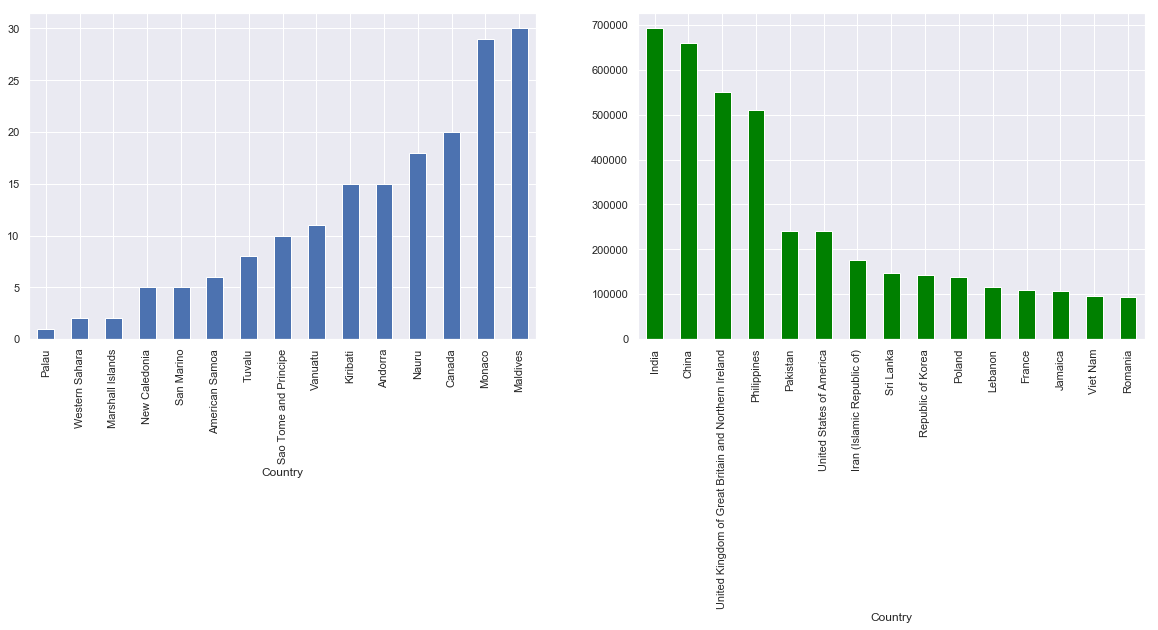

In [100]:
fig = plt.figure(figsize =(20,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_dp.head(15).plot(kind ='bar',ax =ax0)
df_dp.tail(15).sort_values(ascending = False).plot(kind ='bar',ax =ax1,color ='green')